# NAME-SOHIT PATHAK

# ROLL NO: MA22M019

1.   a) Can you perform a simple linear regression (from scratch) analysis to determine if there is a relationship between the phone's  pixel density and its rating using line search approach?
      b) What is the slope and intercept of the regression line, and what is the Mean Squared Error (MSE) for this model?
      c) Plot Cost function (both as surface as well as contour) and best fit line.

In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [175]:
df = pd.read_csv(r"C:\Users\sohit\Downloads\mobile_data (1).csv")

In [176]:
df

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,Resolution,Rating
0,0,403,6.26,182,4,1.8,80.68,157.9,64,4000,20,4.5
1,1,271,6.20,168,3,1.8,80.85,156.2,32,4230,8,4.5
2,2,409,6.30,168,3,2.1,83.68,157.0,32,3500,25,4.4
3,4,411,6.00,169,4,2.2,74.78,159.8,64,3300,24,4.3
4,5,396,6.50,175,4,2.2,84.23,160.4,64,3750,16,4.4
...,...,...,...,...,...,...,...,...,...,...,...,...
336,465,220,5.00,141,1,1.2,67.20,142.7,16,2420,5,3.8
337,466,401,5.50,165,4,1.8,69.95,156.5,64,3000,13,3.9
338,468,282,5.20,160,3,1.4,68.52,149.7,16,3000,8,4.1
339,470,218,4.50,156,1,1.3,63.93,132.0,8,1800,2,3.6


In [177]:
df.isna().sum()

PhoneId                              0
Pixel Density                        0
Screen Size                          0
Weight                               0
RAM                                  0
Processor_frequency                  0
Screen to Body Ratio (calculated)    0
Height                               0
Internal Memory                      0
Capacity                             0
Resolution                           0
Rating                               0
dtype: int64

In [194]:
# normalize
x = df['Pixel Density']
y = df['Rating']
x11 = x.max()
y11 = y.max()
x= x/x11
y= y/y11

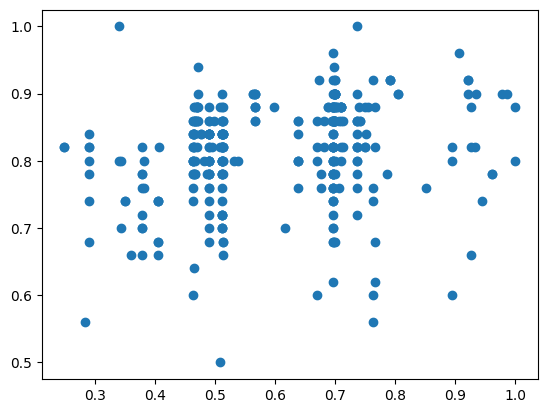

In [179]:
plt.scatter(x,y) # scatter plot

In [180]:
# relationship between Pixel Density and Rating
corr = x.corr(y)
corr

0.21611929572658667

In [181]:
def cost_functioon(W):
    n = len(x)
    total_error = 0.0
    for i in range(n):
        total_error += (y[i] - W[1]*x[i] - W[0])**2
    return total_error/(2*n)
def gradcost_fun(W):
    n=len(x)
    m_gradient=0
    b_gradient=0
    for j in range(n):
            m_gradient += -x[j]*(y[j] - W[1]*x[j] - W[0])
            b_gradient += -(y[j] - W[1]*x[j] - W[0])
    return np.array([m_gradient/n,b_gradient/n])


In [182]:
def LineSearch(J,grad_J,w0=np.array([0,0]),iterations=200,tolerance=10**-4):
    k=0
    w_0=w0
    for k in range(iterations):
        if np.linalg.norm(grad_J(w_0))>tolerance:
            StepL=0.01
            while J(w_0-StepL*grad_J(w_0))>J(w_0)-0.0001*StepL*np.linalg.norm(grad_J(w_0)):   #Calculating Step length
                StepL=StepL/2
                
            p=-grad_J(w_0)
            w_0=w_0+StepL*p
            print(w_0)
    print(f'minimum value will be: {J(w_0)} at {w_0} Number of iterations: {k}' )
    return w_0,J(w_0)


In [183]:
value=LineSearch(cost_functioon,gradcost_fun,w0=np.array([0,0]) )

[0.00489215 0.00814487]
[0.00972409 0.01619214]
[0.01449652 0.02414301]
[0.01921019 0.03199863]
[0.0238658  0.03976018]
[0.02846406 0.04742879]
[0.03300567 0.05500559]
[0.0374913  0.06249169]
[0.04192165 0.0698882 ]
[0.04629738 0.07719621]
[0.05061916 0.08441679]
[0.05488764 0.091551  ]
[0.05910347 0.09859989]
[0.06326728 0.1055645 ]
[0.06737972 0.11244586]
[0.07144139 0.11924496]
[0.07545293 0.12596282]
[0.07941494 0.13260042]
[0.08332801 0.13915874]
[0.08719275 0.14563873]
[0.09100974 0.15204135]
[0.09477956 0.15836753]
[0.09850278 0.16461822]
[0.10217997 0.17079432]
[0.10581168 0.17689674]
[0.10939848 0.18292638]
[0.1129409  0.18888411]
[0.11643948 0.19477082]
[0.11989476 0.20058737]
[0.12330727 0.2063346 ]
[0.12667751 0.21201336]
[0.130006   0.21762449]
[0.13329326 0.2231688 ]
[0.13653978 0.2286471 ]
[0.13974605 0.2340602 ]
[0.14291257 0.23940889]
[0.14603982 0.24469395]
[0.14912826 0.24991616]
[0.15217839 0.25507627]
[0.15519065 0.26017505]
[0.15816552 0.26521323]
[0.16110343 0.27

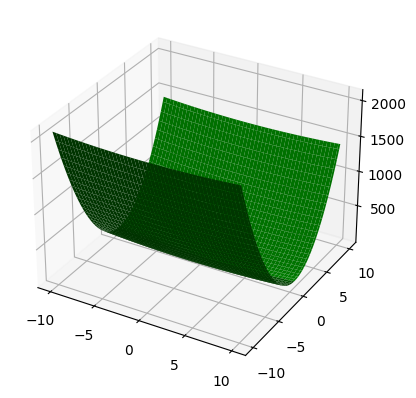

In [185]:
x=np.linspace(-10,10,100)
y=np.linspace(-10,10,100)
xx,yy=np.meshgrid(x,y)
zz=cost_functioon(np.array([xx,yy]))
fig=plt.figure()
ax=fig.add_subplot(projection='3d')
ax.plot_surface(xx,yy,zz,color='g')
plt.show()

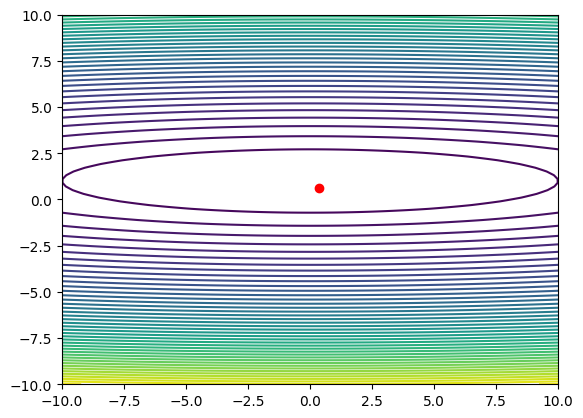

In [186]:
fig, ax = plt.subplots()
ax.contour(xx, yy, zz,50)

ax.plot(value[0][0],value[0][1], 'ro')

plt.show()

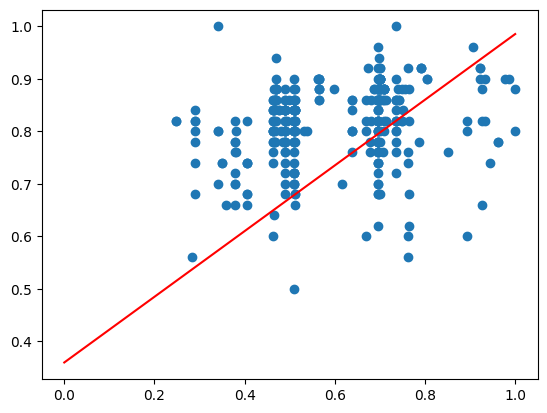

In [196]:
# clearly see line fit is not good bcz of relationship
def model(x):
    return 0.35937968+0.626189*x
x1=np.linspace(0,1,100)
plt.scatter(x,y)
plt.plot(x1,model(x1),color='r')
plt.show()